### Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset (Heart data)

In [44]:
heart_data = pd.read_csv('heart_data.csv')

### Inspecting the Dataset

In [45]:
# Basic Information about the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    float64
 2   cp             303 non-null    float64
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   restecg        303 non-null    float64
 7   thalach        303 non-null    float64
 8   exang          303 non-null    float64
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    float64
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  heart_disease  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [46]:
# The First 10 rows of the data
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [47]:
# Descriptive statistics about the data 
heart_data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


### Data Cleaning

In [48]:
#1 Checking for misrepresented data in the columns

# Viewing unique values in object-type columns for potential conversion or inspection
for column in heart_data.select_dtypes(include=['object']).columns:
    unique_values = heart_data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")



Unique values in 'ca': ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in 'thal': ['6.0' '3.0' '7.0' '?']


In [49]:
# Replacing '?' with NaN in the 'ca' and 'thal' columns

heart_data['ca'] = heart_data['ca'].replace('?', np.NaN).astype(float)
heart_data['thal'] = heart_data['thal'].replace('?', np.NaN).astype(float)

In [50]:
#2 Checking for missing values
heart_data.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               4
thal             2
heart_disease    0
dtype: int64

In [51]:
# Repalce missing values for 'ca' and 'thal' with the mode
heart_data["ca"] = heart_data["ca"].fillna(heart_data["ca"].mode()[0])
heart_data["thal"] = heart_data["thal"].fillna(heart_data["thal"].mode()[0])

#### Heart Disease Transformation
The heart disease column represents the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. To make the analysis easy and concise, all values from 2 through to 4 will be assigned to 1 (which indicates the presence of heart disease).

In [77]:
heart_data["heart_disease"] = heart_data["heart_disease"].replace({2:1,3:1,4:1})
heart_data.value_counts("heart_disease")

heart_disease
0    164
1    139
Name: count, dtype: int64

In [78]:
#3 Checking for duplicates
heart_data.duplicated().sum()

0

### Univariant Analysis


#### Analysing Numerical Variables using Hsitogram and boxplot

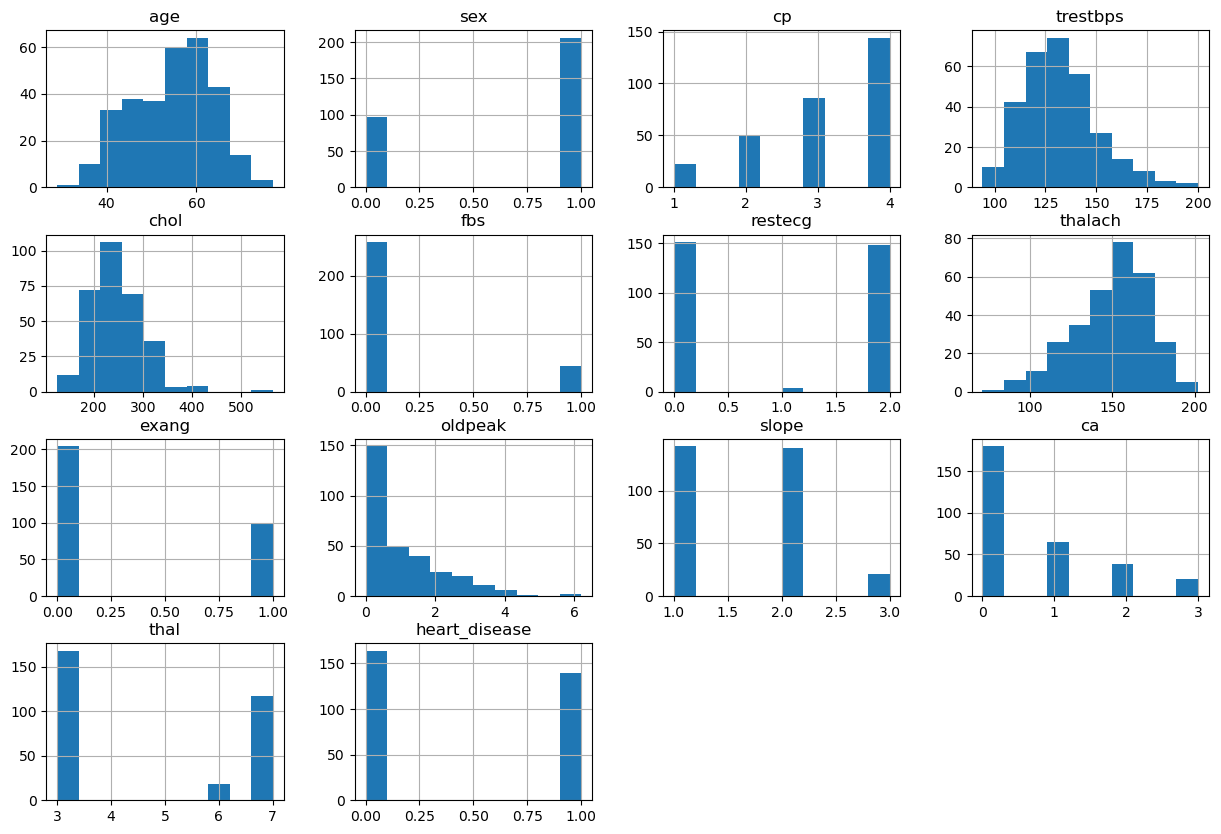

In [55]:
# Visualizing the distributions using histogram
heart_data.hist(figsize=(15,10));

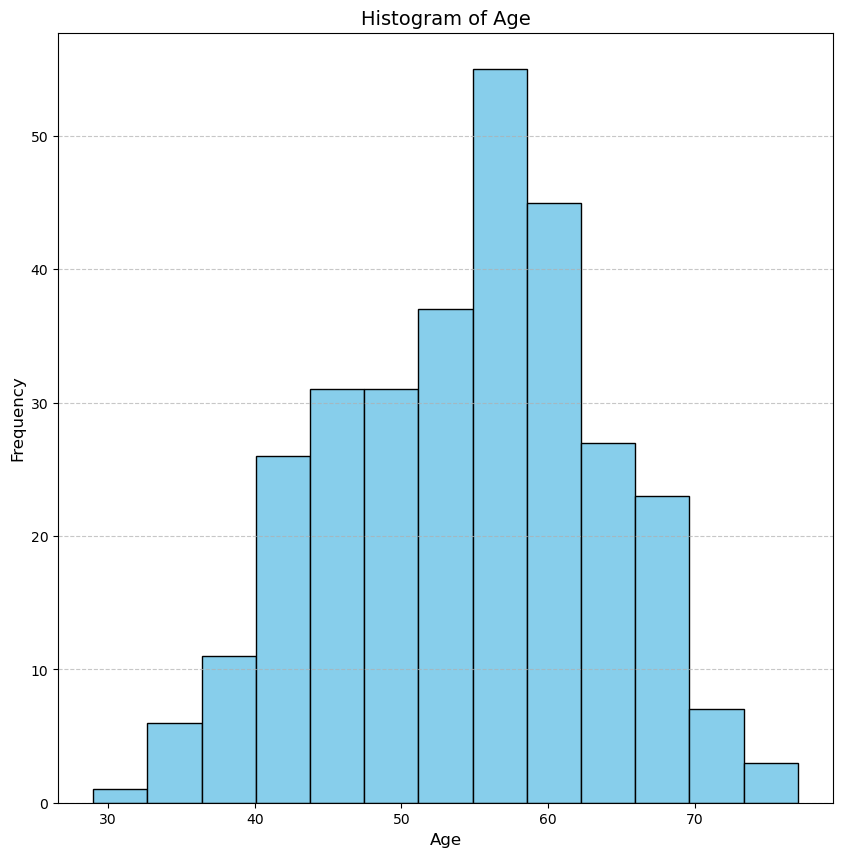

In [56]:
# Distribution of Age (Histogram)
plt.figure(figsize=(10, 10))
plt.hist(heart_data["age"], bins='auto', color='skyblue', edgecolor='black')
plt.title('Histogram of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

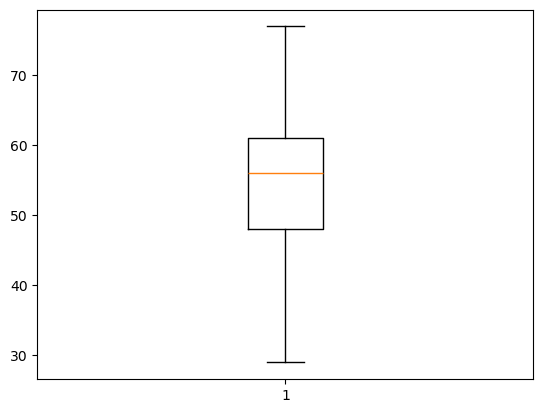

In [57]:
# Distribution of age (boxplot)
plt.boxplot(heart_data["age"])
plt.show()

#### Age Analysis
The distribution shows most of the individuals are in the range of 40 to 70 years

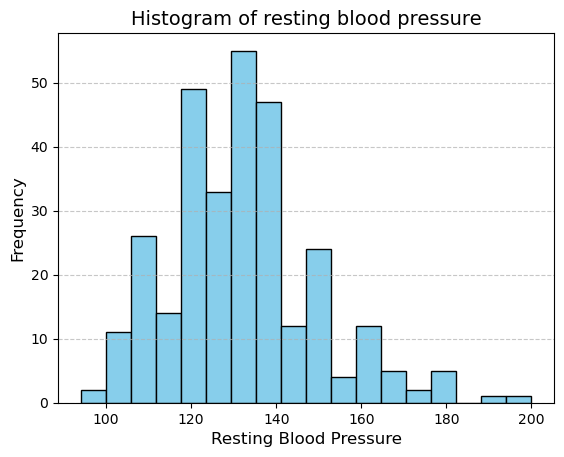

In [58]:
# Distribution of trestbps (Histogram)
plt.hist(heart_data["trestbps"],  bins='auto', color='skyblue', edgecolor='black')
plt.title('Histogram of resting blood pressure', fontsize=14)
plt.xlabel('Resting Blood Pressure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

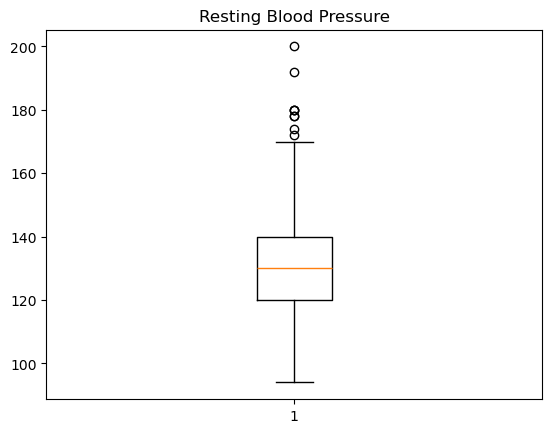

In [59]:
# Distribution of resting blood pressure (boxplot)
plt.boxplot(heart_data["trestbps"])
plt.title("Resting Blood Pressure")
plt.show()

#### Resting Blood Pressure (tresbps) Analysis
The resting blood pressure is centered around 130 mmHg, with some higher values indicating possible hypertension cases. There were some outliers

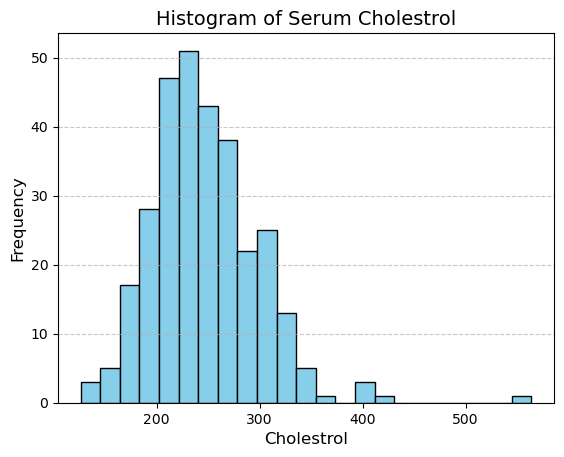

In [60]:
# Distribution of cholestrol (Histogram)
plt.hist(heart_data["chol"], bins='auto', color='skyblue', edgecolor='black' )
plt.title('Histogram of Serum Cholestrol', fontsize=14)
plt.xlabel('Cholestrol', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

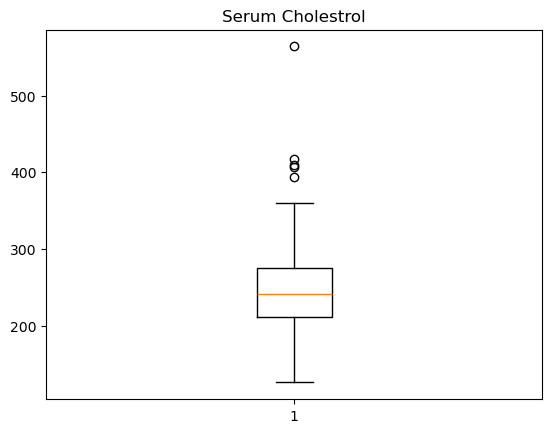

In [61]:
# Distribution of chol (boxplot)
plt.boxplot(heart_data["chol"])
plt.title("Serum Cholestrol")
plt.show()

#### Cholestrol (chol) Analysis
The distribution is rightly-skewed with a peak around 200 mg/dL
There were some significant outliers indicating individuals with very high cholestrol levels

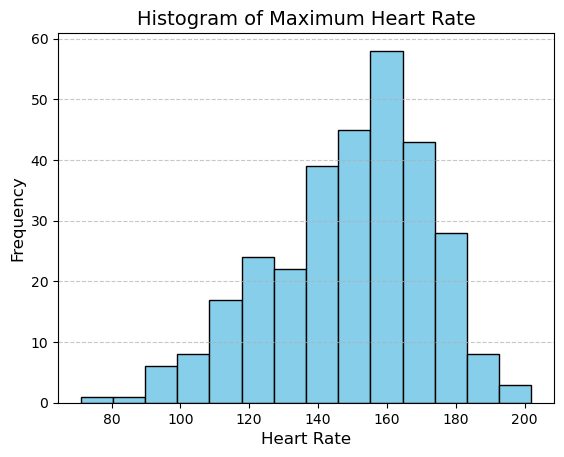

In [62]:
# Distribution of Maximum Heart Rate (Histogram)
plt.hist(heart_data["thalach"], bins='auto', color='skyblue', edgecolor='black' )
plt.title('Histogram of Maximum Heart Rate', fontsize=14)
plt.xlabel('Heart Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

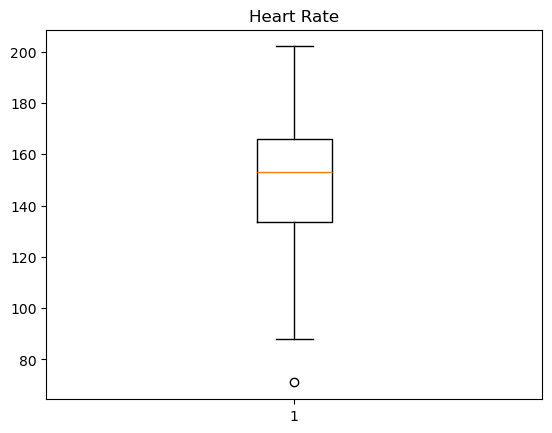

In [63]:
# Distribution of Maximum Heart Rate (boxplot)
plt.boxplot(heart_data["thalach"])
plt.title("Heart Rate")
plt.show()

#### Maximum Heart Rate (thalach) Analysis
The distribution peaks around 150 bpm and has a slightly left-skewed shape. There are few ouliers which are have low values

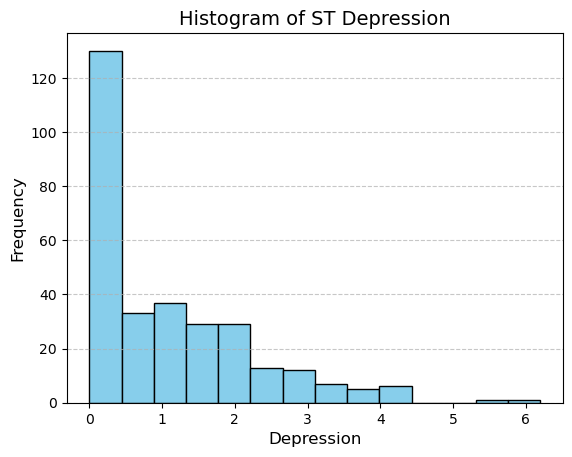

In [64]:
# Distribution of ST Depression (oldpeak)
plt.hist(heart_data["oldpeak"], bins='auto', color='skyblue', edgecolor='black' )
plt.title('Histogram of ST Depression', fontsize=14)
plt.xlabel('Depression', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

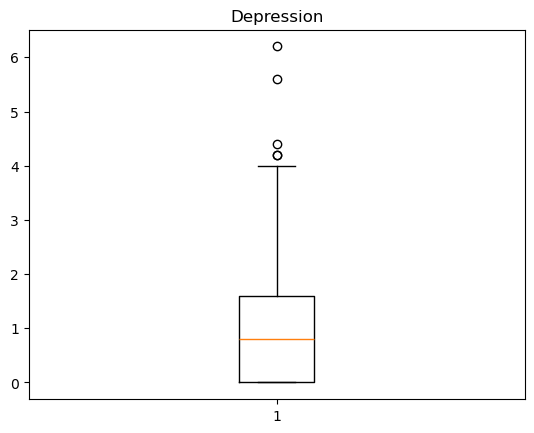

In [65]:
# Distribution of ST Depression (boxplot)
plt.boxplot(heart_data["oldpeak"])
plt.title("Depression")
plt.show()

#### ST Depression (oldpeak) Analysis
Distribution is concentrated at lower values, with a few higher values indicating significant depression due to exercise.

#### Analysing Categorical Variables


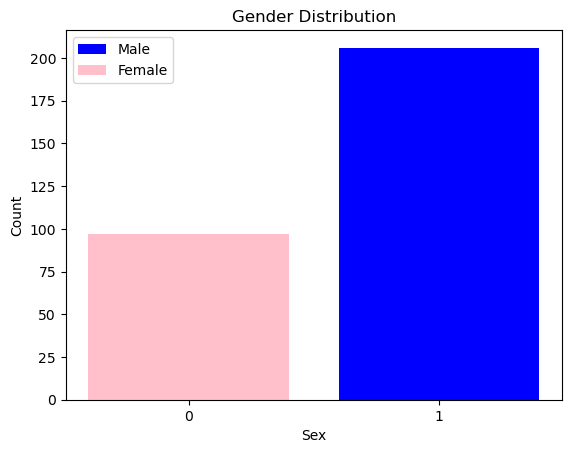

In [66]:
# Bar Chart of Sex
sex_count = heart_data["sex"].value_counts()
fig, sex_graph = plt.subplots()
bars = sex_graph.bar(sex_count.index, sex_count.values, color=["blue", "pink"])
sex_graph.set_xticks([0, 1])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Gender Distribution")
sex_graph.legend(bars, ["Male", "Female"])
plt.show()

#### Gender (sex) Analysis
The bar chart above clearly indicates that there are more males than females in this dataset. The males are about 200 and the females are almost 100

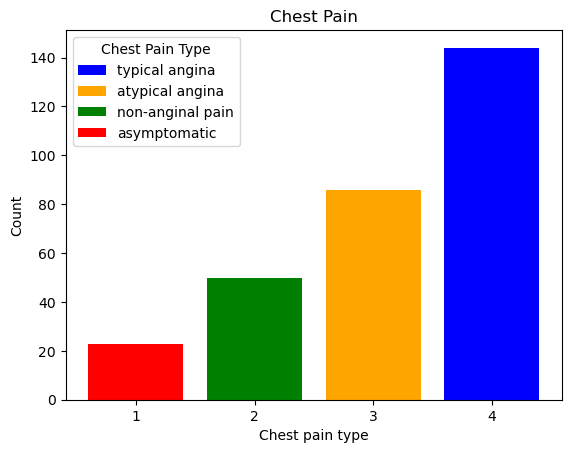

In [67]:
# Bar Chart of Chest Pain (cp)
cp_count = heart_data["cp"].value_counts()
fig, cp_graph = plt.subplots()
bars = cp_graph.bar(cp_count.index, cp_count.values, color=["blue", "orange", "green", "red"])
cp_graph.set_xticks([1, 2, 3, 4])
plt.xlabel("Chest pain type")
plt.ylabel("Count")
plt.title("Chest Pain")
cp_graph.legend(bars, ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"], title="Chest Pain Type")
plt.show()

#### Chest Pain (cp) analysis

The bar chart indicates that, the most dominant chest pain type is the typical angina. About 140 individuals have this type of chest pain. About 80 people have the atypical angina chest pain. A very few experience the asymptomatic chest pain type and about 45 individuals have the non_anginal chest pain

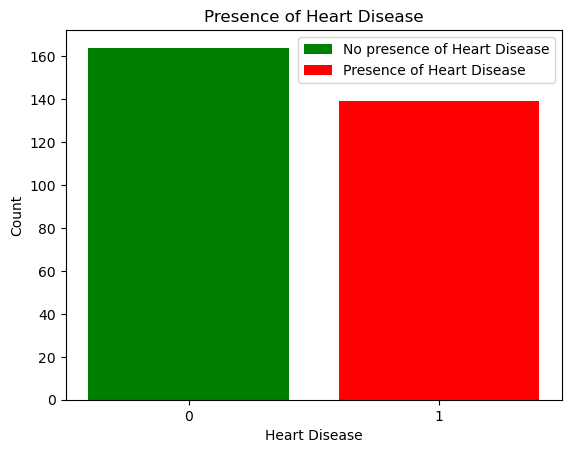

In [79]:
# Bar Chart of Heart Disease
heart_disease_count = heart_data["heart_disease"].value_counts()
fig, heart_disease_graph = plt.subplots()
bars = heart_disease_graph.bar(heart_disease_count.index, heart_disease_count.values, color=["green", "red"])
heart_disease_graph.set_xticks(heart_disease_count.index)
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Presence of Heart Disease")
heart_disease_graph.legend(bars, ["No presence of Heart Disease", "Presence of Heart Disease"])
plt.show()

#### Heart Disease Analysis
The bar chat indicates that about 160 individuals do not have a heart disease and about 140 individuals have heart disease

## Bivariate Analysis

### Numerical - Numerical Relationship


### Relationship between Age and Resting Blood Pressure (trestbps)

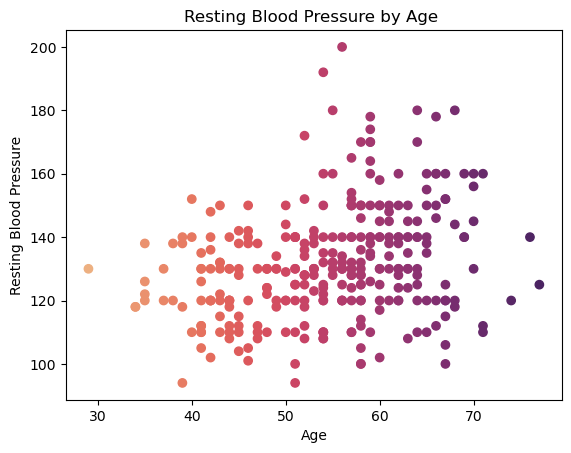

In [69]:
# Scatterplot to explore relationship between Age and trestbps
plt.scatter(heart_data['age'],
            heart_data['trestbps'],
            marker="o",
            c=heart_data['age'],
            cmap='flare')
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.title("Resting Blood Pressure by Age ")
plt.show()

### Age to Resting Blood Pressure Analysis
There seems to be a general trend where resting blood pressure tends to increase with age. As age increases, the resting blood pressure typically rises. The color gradient indicates age, with lighter colors representing younger individuals and darker colors indicating older individuals. The distribution of points suggests that there are more observations in certain age ranges, particularly around the mid-50s to early 60s.

### Relationship between Age and Maximum Heart Rate Achieved (thalach)

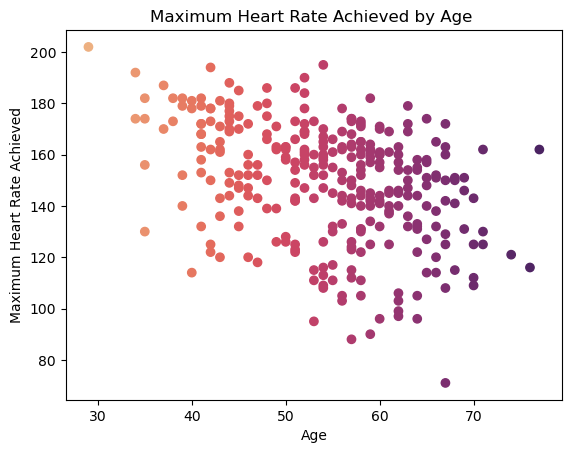

In [70]:
# Scatterplot to explore relationship Age and thalach
plt.scatter(heart_data['age'],
            heart_data['thalach'],
            marker="o",
            c=heart_data['age'],
            cmap='flare')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")
plt.title("Maximum Heart Rate Achieved by Age ")
plt.show()

### Age to Maximum Heart Rate Achieved Analysis
From the graph, it is noticeable that older individuals tend to have lower maximum heart rates. There is a concentration of data points around the ages of 40 to 60, with fewer points as age progresses beyond 70. This may indicate a greater number of observations in middle-aged individuals compared to older adults. Additionally, the color gradient in the scatter plot highlights the age distribution, with lighter colors representing younger individuals and darker colors indicating older individuals.

### The Correlation Matrix

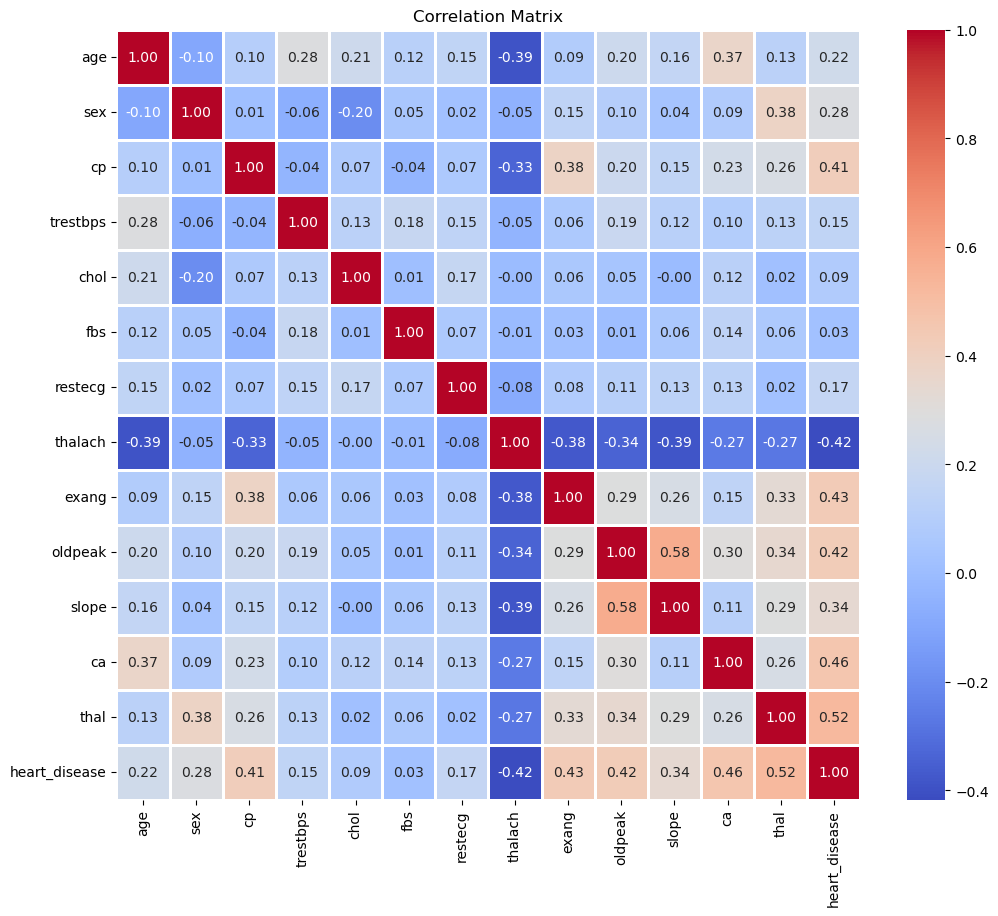

In [71]:
# Correlation matrix
heart_data.corr()
# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix')
plt.show()

### Based on the heatmap above:

1. Age and heart disease have a positive correlation (0.22), indicating that as people age, the risk of heart disease increases.

2. Cholesterol (chol) also has a positive correlation (0.22) with heart disease, meaning higher cholesterol levels are associated with greater heart disease risk.

3. Maximum heart rate (thalach) shows a negative correlation (-0.42) with heart disease, suggesting that higher maximum heart rates are linked to lower heart disease risk.

4. Resting blood pressure (trestbps) has a weaker positive correlation (0.14) with heart disease compared to age and cholesterol.

5. The correlation between sex and heart disease is quite low (0.04), implying sex may not be a strong direct predictor of heart disease risk in this dataset.

6. Exercise-induced angina (exang) has a positive correlation (0.15) with heart disease, suggesting this symptom is associated with higher heart disease risk.

7. Other variables like chest pain type (cp) and the slope of the peak exercise ST segment (slope) show varying degrees of correlation, but they do not appear to be as strongly related to heart disease risk as the factors mentioned above.

### Categorical - Numerical Relationship

### Relationship between Heart disease and cholestrol (chol)

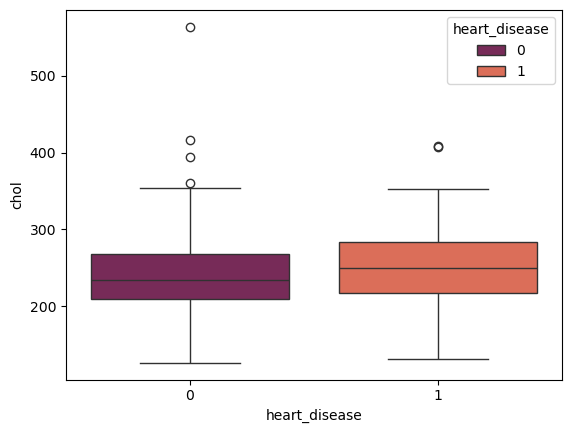

In [72]:
# Plotting the heart_disease vrs the chol
sns.boxplot(
    x='heart_disease',
    y='chol',
    hue = 'heart_disease',
    palette="rocket",
    data = heart_data
    );

### Heart Disease to Cholesterol Analysis
The boxplot indicates that individuals without heart disease (0) generally have higher cholesterol levels than those with heart disease (1). This could imply a potential relationship where higher cholesterol levels might be associated with a lower risk of heart disease in this dataset. However, this observation should be interpreted with caution, as other factors could also influence cholesterol levels and heart disease risk.

### Relationship between Heart disease and Resting Blood Pressure (trestbps)


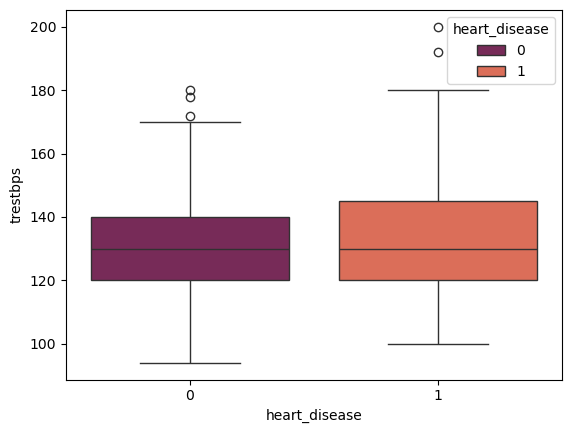

In [73]:
sns.boxplot(
    x='heart_disease',
    y='trestbps',
    hue = 'heart_disease',
    palette="rocket",
    data = heart_data
    );

### Heart Disease to Resting Blood Pressure Analysis
The boxplot indicates that individuals with heart disease (1) generally have lower resting blood pressure levels than those without heart disease (0). This could suggest a potential relationship where lower resting blood pressure is associated with heart disease in this dataset.


### Categorical - Categorical Relationship

### Relationship between Sex and Heart Disease

In [74]:
# Crosstap to explore the relationship between sex and heart disease
pd.crosstab(heart_data['sex'],heart_data['heart_disease'])

heart_disease,0,1
sex,,
0.0,72,25
1.0,92,114


### Sex to Heart Disease Analysis
The Crostab suggests that males are more likely to have heart disease compared to females. The higher count of males with heart disease (114) compared to females (25) indicates a potential trend where heart disease is more prevalent in men.

### Relationship between Chest Pain Type and Heart Disease


In [75]:
# Crosstap to explore the relationship between Cp and heart disease
pd.crosstab(heart_data['cp'],heart_data['heart_disease'])

heart_disease,0,1
cp,,
1.0,16,7
2.0,41,9
3.0,68,18
4.0,39,105


### Cp to heart disease analysis
The crosstab suggests that while chest pain type can be indicative of heart disease risk, there is a high number of people with asymptomatic chest pain type who have heart disease. This indicates people with asymptomatic Chest Pain type are associated with heart disease

## Multivariate Analysis

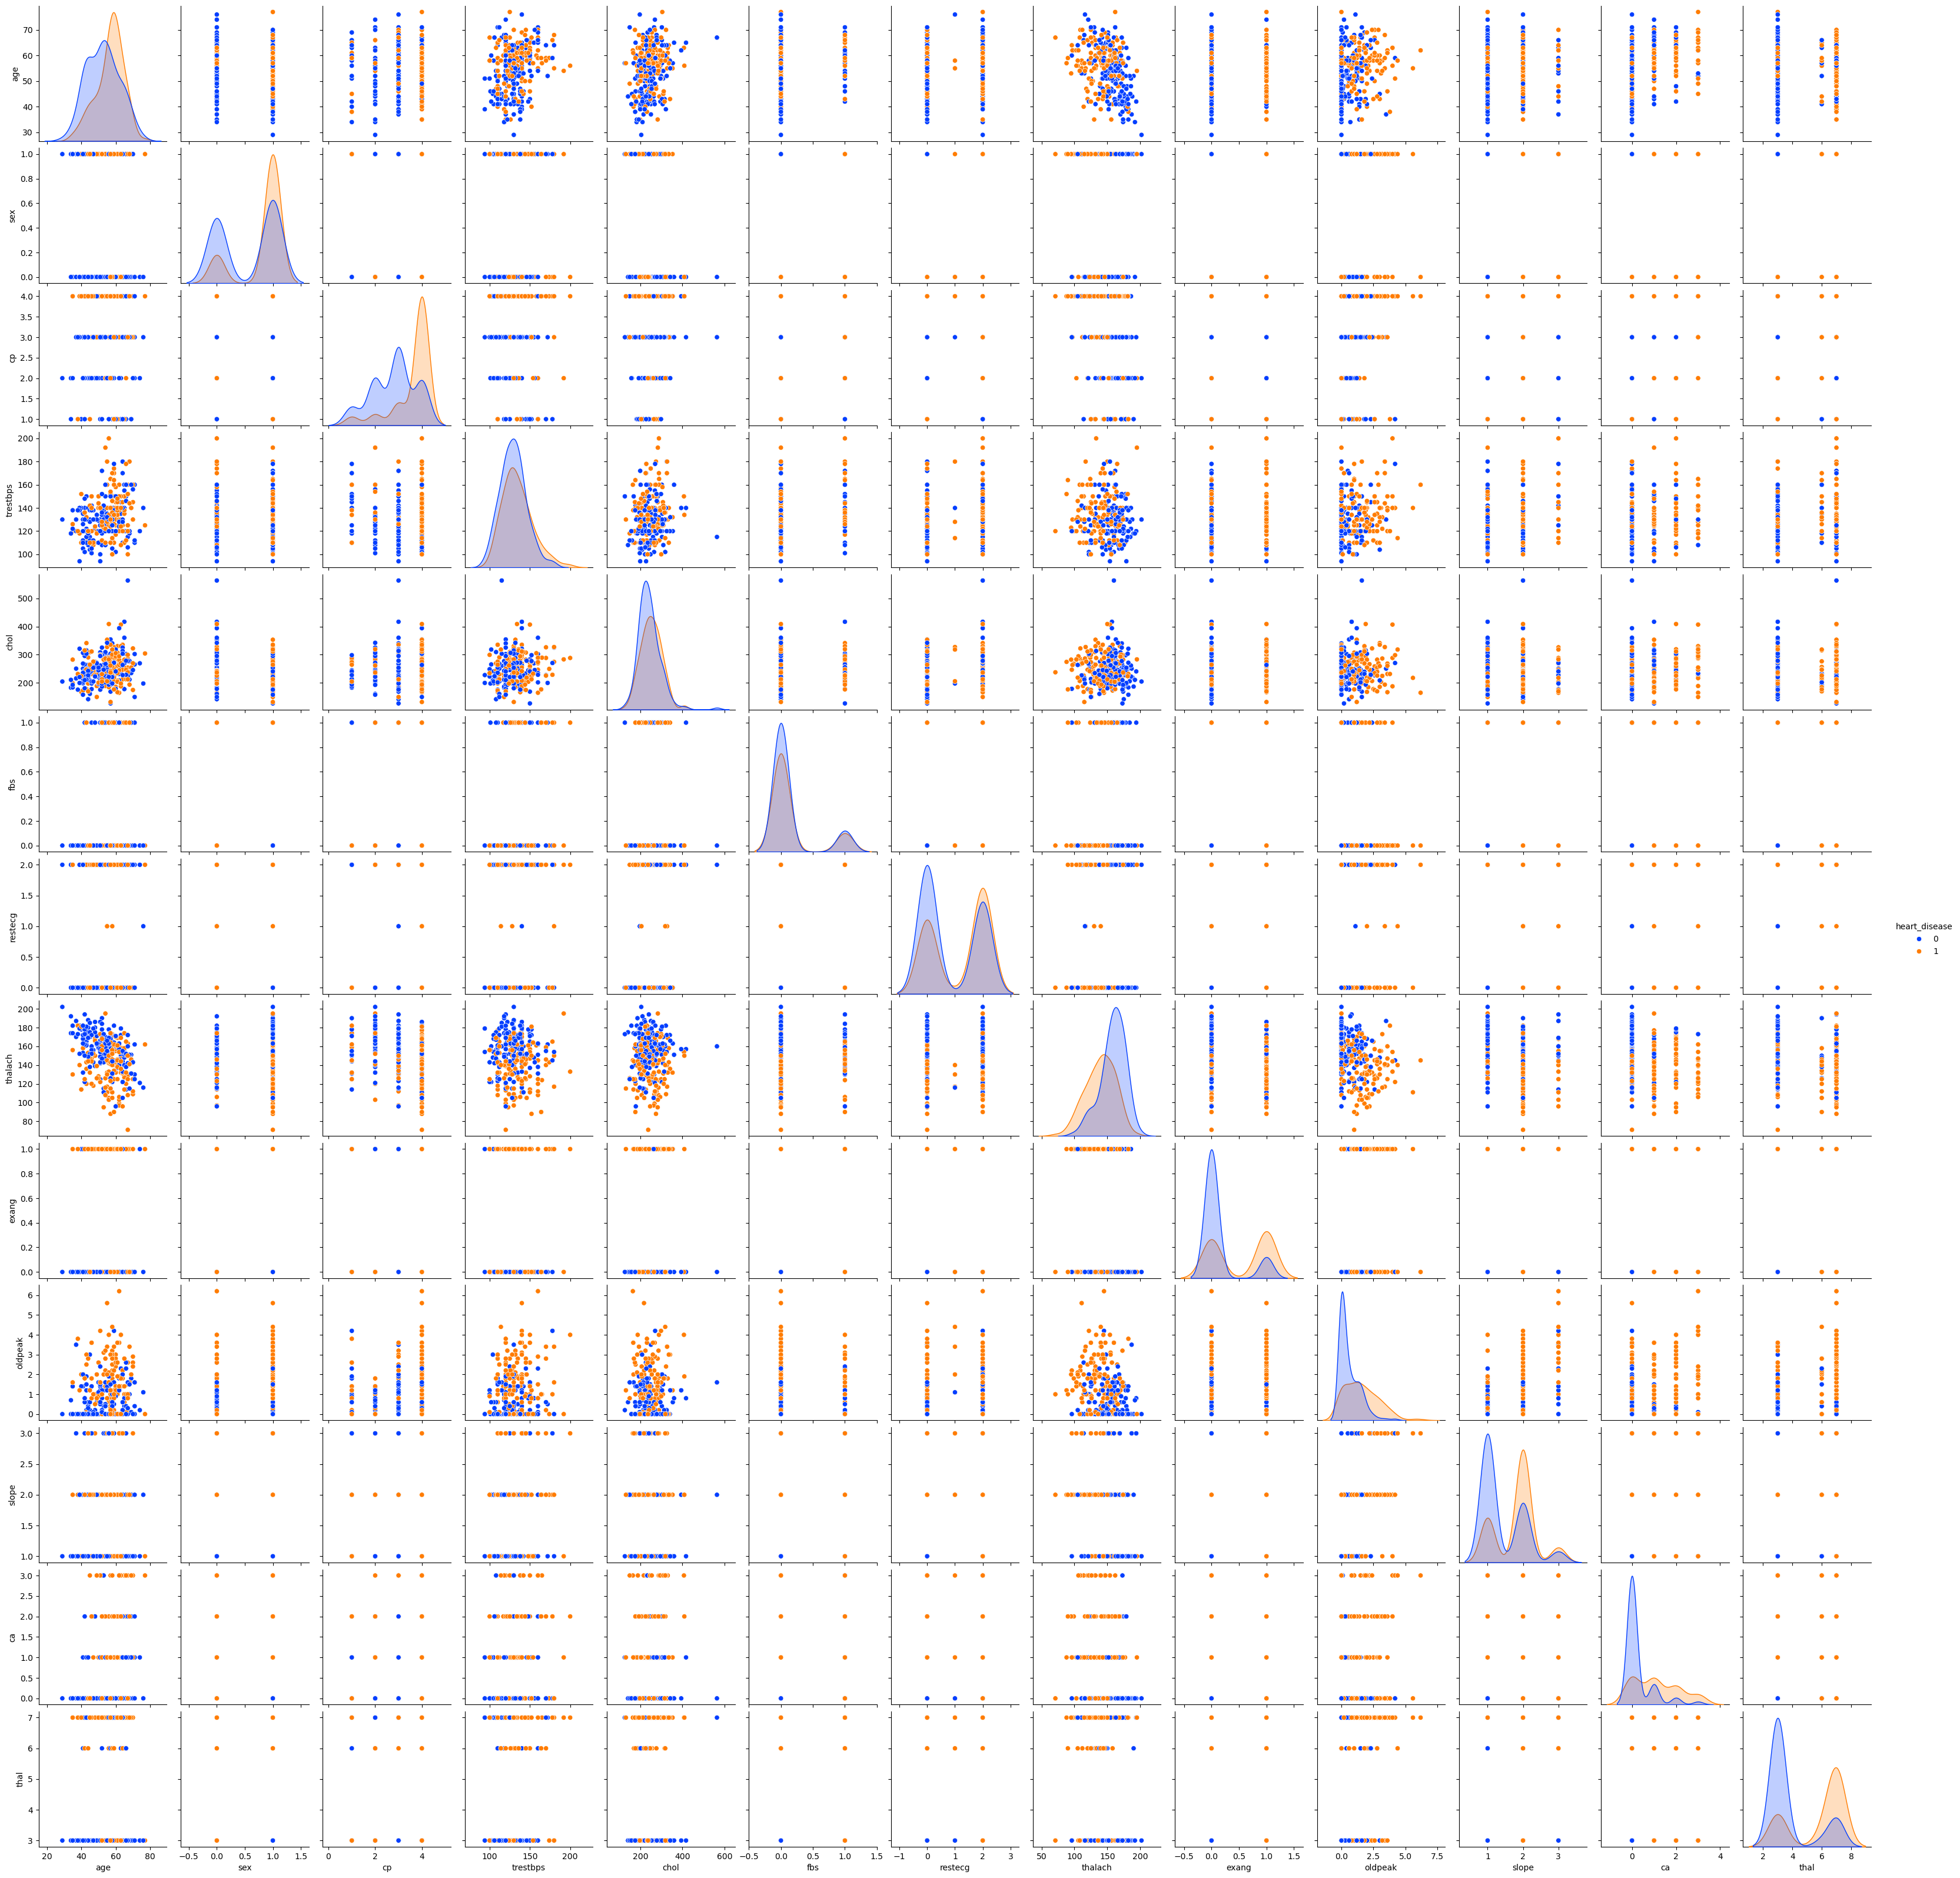

In [76]:
# Using the paiplots to visualize multiple relationship
sns.pairplot(data=heart_data,hue="heart_disease",palette="bright");

### Anlaysis of the pairplot
The scatterplot comparing age and thalach (maximum heart rate during an exercise test) demonstrates a clear separation. It suggests that older patients with low thalach are more likely to have heart disease, while younger patients with high thalach are less likely.